# Exploring Ebay Car Sales Data<br>
by Adam M Lang

In this project, I'm going to work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.<br>

The dataset was originally scraped and uploaded to Kaggle. It can be found [here](https://www.kaggle.com/orgesleka/used-cars-database/data?select=autos.csv").

The data dictionary provided on Kaggle is as follows:<br>

- **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
- **name** - Name of the car.
- **seller** - Whether the seller is private or a dealer.
- **offerType** - The type of listing
- **price** - The price on the ad to sell the car.
- **abtest** - Whether the listing is included in an A/B test.
- **vehicleType** - The vehicle Type.
- **yearOfRegistration** - The year in which the car was first registered.
- **gearbox** - The transmission type.
- **powerPS** - The power of the car in PS.
- **model** - The car model name.
- **kilometer** - How many kilometers the car has driven.
- **monthOfRegistration** - The month in which the car was first registered.
- **fuelType** - What type of fuel the car uses.
- **brand** - The brand of the car.
- **notRepairedDamage** - If the car has a damage which is not yet repaired.
- **dateCreated** - The date on which the eBay listing was created.
- **nrOfPictures** - The number of pictures in the ad.
- **postalCode** - The postal code for the location of the vehicle.
- **lastSeenOnline** - When the crawler saw this ad last online.

# The goal of this project is to clean the dataset and analyze the included used car listings.

In [133]:
#import libraries
import numpy as np
import pandas as pd

In [134]:
#read file into notebook
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [135]:
#view dataset
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [136]:
#info on dataset
autos.info

<bound method DataFrame.info of                 dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest ve

In [137]:
#examine shape of data
autos.shape

(371528, 20)

So far we can see there are 371,528 rows and 20 columns. There appear to be som NaN values as well. Let's look further by examining the head and tail of the data. 

In [138]:
#head of dataset
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [139]:
#tail of dataset
autos.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


Other interesting findings so far:<br>
- All column names are lowercase.<br>
- Date/Time format is not standard. The time is based on the 24 hour or military clock.<br>
- Month of Registration is numeric. <br>
- The dataset contains 20 columns, most of which are string data types.<br>
- Some columns have null values (NaN), but none have more than ~20% null values.<br>
- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.

# Clean Columns

In [140]:
#print columns
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We'll make a few changes to these columns:<br>

- Change the columns from camelcase to snakecase.<br>
- Change a few wordings to more accurately describe the columns.<br>

In [141]:
#function to strips spaces before and after column names and replace column names

def clean_col(col):
    col=col.strip()
    col=col.replace("yearOfRegistration","registration_year")
    col=col.replace("monthOfRegistration","registration_month")
    col=col.replace("notRepairedDamage","unrepaired_damage")
    col=col.replace("dateCreated","ad_created")
    return col

#iterate over columns and append changes to a new list
new_columns=[]
for c in autos.columns:
    clean_c=clean_col(c)
    new_columns.append(clean_c)

#assign changes in new list back to columns
autos.columns = new_columns

In [142]:
#check head of dataset
autos.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,kilometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [143]:
#make additional changes to change camelcase to snakecase
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# Initial Exploration and Cleaning

In [144]:
#describe
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


So far we notice a few things:
- The **seller** and **offer_type** columns look virtually the same
- The **num_photos** column is rather strange with a value of zero for all possible values, we should examine this further. 

In [145]:
#examine num_photos
autos["num_photos"].value_counts()

0    371528
Name: num_photos, dtype: int64

In [146]:
#examine seller
autos["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [147]:
#examine offer_type
autos["offer_type"].value_counts()

Angebot    371516
Gesuch         12
Name: offer_type, dtype: int64

It appears as though num_photos has a 0 for every column. Let's go ahead and drop this in addition to the 2 other columns identified above as having mostly one value. 

In [148]:
autos = autos.drop(["num_photos","seller","offer_type"], axis=1)

In [149]:
autos.head(3)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46


In [150]:
#examine dtypes
autos.dtypes

date_crawled          object
name                  object
price                  int64
ab_test               object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer               int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
postal_code            int64
last_seen             object
dtype: object

In [151]:
#rename odometer to odometer_km
autos.rename({"odometer":"odometer_km"},axis=1, inplace=True)
autos["odometer_km"].head()

0    150000
1    125000
2    125000
3    150000
4     90000
Name: odometer_km, dtype: int64

# Exploring the Odometer and Price Columns

In [152]:
autos["odometer_km"].value_counts()

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: odometer_km, dtype: int64

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.

In [153]:
#explore price column further

print(autos["price"].unique().shape)
print(autos["price"].describe())
autos["price"].value_counts().head(20)

(5597,)
count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64


0       10778
500      5670
1500     5394
1000     4649
1200     4594
2500     4438
600      3819
3500     3792
800      3784
2000     3432
999      3364
750      3203
650      3150
4500     3053
850      2946
2200     2936
700      2936
1800     2886
900      2874
950      2793
Name: price, dtype: int64

Again, the prices in this column seem rounded, however given there are 5597 unique values in the column, that may just be people's tendency to round prices on the site.

There are 10,778 cars listed with $0 price. The maximum price is rather interesting, which seems a lot, let's look at the highest prices further.

In [154]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
Name: price, dtype: int64

In [155]:
autos["price"].value_counts().sort_index(ascending=True).head(30)

0     10778
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
21        1
24        1
25       33
26        1
27        1
29        2
30       55
32        1
33        1
35       18
Name: price, dtype: int64

There are a number of listings with prices below 35 dollars including about 10,778 at 0 dollars. There are also a small number of listings with very high values, including 14 at around or over 1 million dollars.

Given that eBay is an auction site, there could legitimately be items where the opening bid is 1 dollar. We will keep the 1 dollar items, but remove anything above 350,000 dollars since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [156]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count    360635.000000
mean       5898.671956
std        8866.359669
min           1.000000
25%        1250.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

# Exploring the date columns

There are 5 columns that should represent date values. They are as follows:<br>
- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

In [157]:
#check data types
autos.dtypes

date_crawled          object
name                  object
price                  int64
ab_test               object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km            int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
postal_code            int64
last_seen             object
dtype: object

Right now, the **date_crawled**, **last_seen**, and **ad_created** columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. The other two columns are represented as numeric values, so we can use methods like Series.describe() to understand the distribution without any extra data processing.

In [158]:
#look at values in 3 string columns are formatted
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


You'll notice that the first 10 characters represent the day (i.e. 2016-03-12). To understand the date range, we can extract just the date values, use Series.value_counts() to generate a distribution, and then sort by the index.

We will do the following:
- first 10 characters in each column, we can use Series.str[:10]:
- include missing values in the distribution and to use percentages instead of counts
- rank by date in ascending order (earliest to latest)

In [159]:
(autos['date_crawled']
 .str[:10]
 .value_counts(normalize=True,dropna=False)
 .sort_index())

2016-03-05    0.025547
2016-03-06    0.014483
2016-03-07    0.035657
2016-03-08    0.033469
2016-03-09    0.034115
2016-03-10    0.032645
2016-03-11    0.032773
2016-03-12    0.036242
2016-03-13    0.015783
2016-03-14    0.036330
2016-03-15    0.033424
2016-03-16    0.030205
2016-03-17    0.031647
2016-03-18    0.013119
2016-03-19    0.035271
2016-03-20    0.036400
2016-03-21    0.035682
2016-03-22    0.032493
2016-03-23    0.032002
2016-03-24    0.029914
2016-03-25    0.032800
2016-03-26    0.031974
2016-03-27    0.030227
2016-03-28    0.035063
2016-03-29    0.034126
2016-03-30    0.033535
2016-03-31    0.031872
2016-04-01    0.034145
2016-04-02    0.035094
2016-04-03    0.038812
2016-04-04    0.037628
2016-04-05    0.012780
2016-04-06    0.003128
2016-04-07    0.001617
Name: date_crawled, dtype: float64

It appears that the site was 'crawled' everyday in March and April 2016. The values are roughly the same for each daily crawling.

In [160]:
(autos['last_seen'].str[:10].value_counts(normalize=True,dropna=False).sort_index())

2016-03-05    0.001264
2016-03-06    0.004098
2016-03-07    0.005202
2016-03-08    0.007939
2016-03-09    0.009824
2016-03-10    0.011460
2016-03-11    0.012955
2016-03-12    0.023240
2016-03-13    0.008410
2016-03-14    0.012176
2016-03-15    0.016324
2016-03-16    0.016418
2016-03-17    0.028699
2016-03-18    0.006888
2016-03-19    0.016330
2016-03-20    0.019884
2016-03-21    0.020026
2016-03-22    0.020508
2016-03-23    0.018015
2016-03-24    0.019163
2016-03-25    0.019000
2016-03-26    0.015958
2016-03-27    0.016721
2016-03-28    0.022189
2016-03-29    0.023284
2016-03-30    0.023725
2016-03-31    0.024243
2016-04-01    0.023897
2016-04-02    0.024967
2016-04-03    0.025308
2016-04-04    0.025536
2016-04-05    0.126962
2016-04-06    0.218950
2016-04-07    0.130437
Name: last_seen, dtype: float64

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.<br>

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

In [161]:
print(autos["ad_created"].str[:10].unique().shape)
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

(114,)


2014-03-10    0.000003
2015-03-20    0.000003
2015-06-11    0.000003
2015-06-18    0.000003
2015-08-07    0.000003
                ...   
2016-04-03    0.039001
2016-04-04    0.037736
2016-04-05    0.011613
2016-04-06    0.003119
2016-04-07    0.001553
Name: ad_created, Length: 114, dtype: float64

It appears most of the ads were created in April based on these findings. 

Now let's look at registration year:

In [162]:
autos['registration_year'].describe()

count    360635.000000
mean       2004.433133
std          81.016977
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

The year that the car was first registered will likely indicate the age of the car. Looking at this column, we note some odd values. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future.<br>

The interesting thing about this is that the mean registration year is 2004 which is also the median at 50%. The 3rd quartile which is 75% is only 4 years beyond that at 2008 and the 1st quartile at 25% is 1999. It seems the majority of cars were registered around this period of 1999 to 2008. However, the standard deviation is 81 years which is interesting. 

Let's examine a histogram of the registration years to further evaluate this:

In [163]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Number of Autos')

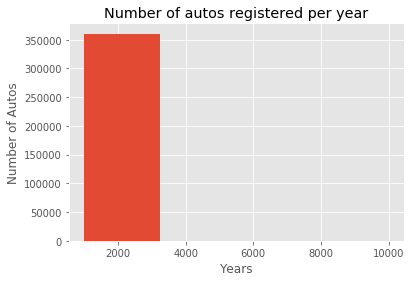

In [164]:
#histogram
plt.hist(autos['registration_year'].values,bins=4);
plt.title('Number of autos registered per year')
plt.xlabel('Years')
plt.ylabel('Number of Autos')

As we can see the histogram confirms that the distribution is not normal and the mean registration year is focused around the year 2004 as seen by the mean in the describe function. 

# Dealing with Incorrect Registration Year Data

One thing that stands out from the exploration we did is that the registration_year column contains some odd values:

- The minimum value is 1000, before cars were invented<br>
- The maximum value is 9999, many years into the future<br>

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.<br>

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.One option is to remove the listings with these values. Let's determine what percentage of our data has invalid values in this column:

In [165]:
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0]

0.038751091824143526

This is less than 4% of our data so we will remove these rows. 

In [166]:
# Many ways to select rows in a dataframe that fall within a value range for a column.
# Using `Series.between()` is one way.
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True, ascending=False).head(20)

2000    0.066699
1999    0.063552
2005    0.062669
2006    0.057708
2001    0.056955
2003    0.056557
2004    0.056173
2002    0.054290
2007    0.050499
1998    0.049691
2008    0.046256
2009    0.044707
1997    0.040469
2010    0.035386
2011    0.034605
1996    0.030029
2012    0.026998
2016    0.026585
1995    0.025959
2013    0.017657
Name: registration_year, dtype: float64

Now it appears that most of the vehicles were registered in the past 20 years with the most being in 2000, 1999 and 2005 respectively. Interesting is the bottom 3 of this listing are in 2016, 1995, and 2013. 

# Exploring Price by Brand

In [167]:
#examine the brands of cars
autos['brand'].value_counts(normalize=True)

volkswagen        0.211700
bmw               0.109871
opel              0.106410
mercedes_benz     0.096841
audi              0.089543
ford              0.068918
renault           0.047516
peugeot           0.030153
fiat              0.025691
seat              0.018661
skoda             0.015687
mazda             0.015384
smart             0.014331
citroen           0.013950
nissan            0.013598
toyota            0.012932
hyundai           0.009972
sonstige_autos    0.009493
mini              0.009384
volvo             0.009147
mitsubishi        0.008236
honda             0.007532
kia               0.006915
suzuki            0.006364
alfa_romeo        0.006309
porsche           0.006211
chevrolet         0.005022
chrysler          0.003863
dacia             0.002495
jeep              0.002192
land_rover        0.002166
daihatsu          0.002161
subaru            0.002117
jaguar            0.001734
saab              0.001465
daewoo            0.001457
trabant           0.001408
l

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.<br>

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [168]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [169]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5400,
 'bmw': 8449,
 'opel': 2971,
 'mercedes_benz': 8551,
 'audi': 9086,
 'ford': 3696}

Of the top 5 brands, there is a distinct price gap:<br>

- Audi, BMW and Mercedes Benz are more expensive with audi being the most expensive<br>
- Ford and Opel are less expensive with open being the least expensive<br>
- Volkswagen is in between - this may explain its popularity, it may be a 'best of 'both worlds' option.

# Exploring Mileage

In [170]:
bmp_series = pd.Series(brand_mean_prices)
pd.DataFrame(bmp_series, columns=["mean_price"])

,mean_price
volkswagen,5400
bmw,8449
opel,2971
mercedes_benz,8551
audi,9086
ford,3696


In [171]:
brand_mean_mileage = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

In [172]:
brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_info

,mean_mileage
bmw,132800
mercedes_benz,130572
audi,129443
opel,128722
volkswagen,128386
ford,123662


In [173]:
brand_info["mean_price"] = mean_prices
brand_info

,mean_mileage,mean_price
bmw,132800,8449
mercedes_benz,130572,8551
audi,129443,9086
opel,128722,2971
volkswagen,128386,5400
ford,123662,3696


It appears that the more expensive car brands have higher mean mileage and the less expensive car brands have the lower mean mileage. Let's perform some exploratory analysis of correlation values. 

In [175]:
brand_info.corr()

,mean_mileage,mean_price
mean_mileage,1.000000,0.695292
mean_price,0.695292,1.000000


The correlation between mean_price and mean_mileage is about .70 which is strong as we thought. 

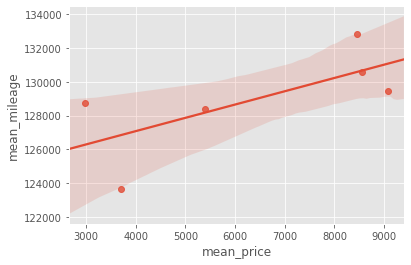

In [176]:
sns.regplot(x='mean_price',y='mean_mileage', data=brand_info);

# Let's examine the autos dataset further

In [177]:
autos.corr()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
price,1.000000,0.301188,0.190771,-0.387118,0.053547,0.073253
registration_year,0.301188,1.000000,0.072334,-0.261530,0.068036,0.040230
power_ps,0.190771,0.072334,1.000000,-0.013845,0.039094,0.026370
odometer_km,-0.387118,-0.261530,-0.013845,1.000000,-0.003663,-0.028800
registration_month,0.053547,0.068036,0.039094,-0.003663,1.000000,0.009810
postal_code,0.073253,0.040230,0.026370,-0.028800,0.009810,1.000000


Offhand it appears that **registration_year and price** have the strongest correlation. From there it looks as though the following may be strongly correlated:<br>
- price and power_ps
- power_ps and registration_year
- price and postal_code

Let's examine Pearson Correlation Coefficient

In [119]:
from scipy import stats

In [120]:
pearson_coef, p_value = stats.pearsonr(autos['price'],autos['power_ps'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.19077099112998191  with a P-value of P = 0.0


In [121]:
pearson_coef, p_value = stats.pearsonr(autos['power_ps'],autos['registration_year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07233413901807077  with a P-value of P = 0.0


In [182]:
pearson_coef, p_value = stats.pearsonr(autos['odometer_km'],autos['registration_year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.26152970339754683  with a P-value of P = 0.0


In [183]:
pearson_coef, p_value = stats.pearsonr(autos['price'],autos['registration_year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3011879307710049  with a P-value of P = 0.0


The p values for all hypothesis tests indicate that although the Pearson correlation coefficient is small, it is significant as the p value is less than 0.05.<br>

So we can say that price, power_ps, and registration_year are significant out of the numeric values in the dataset. It is also obvious that the strongest correlation based on Pearson coefficient is registration year and price and this is also significant. 

# Linear Regression

Let's first group our results based on the mean for each value tested above for each brand of car. 

In [180]:
# grouping results
df_gptest = autos[['odometer_km','power_ps','brand','price', 'registration_year']]
grouped_test1 = df_gptest.groupby(['brand'],as_index=False).mean()
grouped_test1

,brand,odometer_km,power_ps,price,registration_year
0,alfa_romeo,129108.367627,145.712849,4291.759945,2002.179698
1,audi,129443.961213,158.585194,9086.279598,2003.939950
2,bmw,132800.094518,167.671839,8449.121823,2003.010108
3,chevrolet,100146.467547,132.985640,7117.870190,2002.272832
4,chrysler,134215.832711,149.318148,4121.688574,2001.425691
5,citroen,120214.019851,89.124483,3734.280604,2004.015715
6,dacia,86080.924855,81.789595,5922.862428,2010.290173
7,daewoo,123970.297030,72.295050,1027.841584,2002.215842
8,daihatsu,119125.500668,56.279039,1775.097463,2002.594126
9,fiat,116619.694588,71.818662,2892.953514,2002.944083


In [181]:
grouped_test1.describe()

,odometer_km,power_ps,price,registration_year
count,40.000000,40.000000,40.000000,40.000000
mean,116538.419678,114.893549,6467.365615,2002.342197
std,18010.629135,46.278853,6813.895147,4.181791
min,55471.311475,16.692623,1027.841584,1982.590164
25%,108540.916825,91.132240,3378.107998,2001.378871
50%,121689.334183,102.890991,4338.954904,2002.540672
75%,128010.410354,141.875705,6677.350685,2003.950302
max,141673.228346,276.051092,42258.824431,2010.290173


Let's examine some seaborn regplots to see what early correlations we can gather between these variables and registration year. 

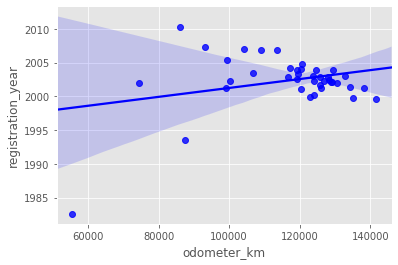

In [199]:
#lets look at a regplot in seaborn to see correlation between registration year and odometer_km
sns.regplot(x='odometer_km',y='registration_year',data=grouped_test1, color = 'blue');

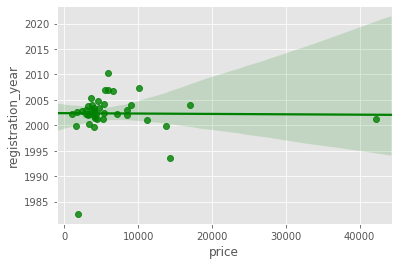

In [205]:
#lets look at another regplot to see if there may be a correlation between price and registration year. 
sns.regplot(x='price',y='registration_year',data=grouped_test1, color = 'green');

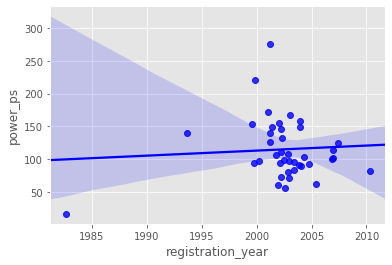

In [204]:
#here is one more regplot looking at power_ps and registration year
sns.regplot(x='registration_year',y='power_ps',data=grouped_test1, color = 'blue');

It appears there may be more correlation and causation with odometer reading related to the registration year. Let's perform linear regression to test the predictive value of odometer_km, power_ps, and price vs. registration year to test the above hypothesis. 

### Let's perform linear regression to examine the 3 independent variables evaluated above (odometer_km, price, power_ps) and how they predict registration year. 

In [186]:
# Import LinearRegression from sklearn.linear_model.
from sklearn.linear_model import LinearRegression

In [187]:
# Set up our X and y variables.

y = autos['registration_year'] # y = what we want to predict
X = autos[['odometer_km','power_ps','price']] # X = what we use to predict y



In [188]:
#function for MSE
def MSE(y_true, y_hat):
    diff = y_true - y_hat
    squared_diff = diff**2
    return np.mean(squared_diff)

In [189]:
# Instantiate our model.
model = LinearRegression()

In [190]:
# Fit our model.
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
# Generate predictions.
predictions = model.predict(X)

In [192]:
# Evaluate our model's performance.
MSE(y, predictions)

46.39324690927525

In [193]:
# Print out the model coefficients.
model.coef_

array([-3.13078583e-05,  1.01501066e-03,  1.85170609e-04])

Interpretation of coefficientS:
    1. For every 1 increase in odometer_km there is a 3.13 decrease in the registration year.
    2. For every 1 increase in power_ps there is a 1.01 increase in registration year.
    3. For every 1 increase in price there is a 1.85 increase in registration year.
Summary: There is a stronger correlation of the 3 variables in the multivariate regression showing registration year is most influenced by price, the price goes up by almost 2 units for every registration year. 

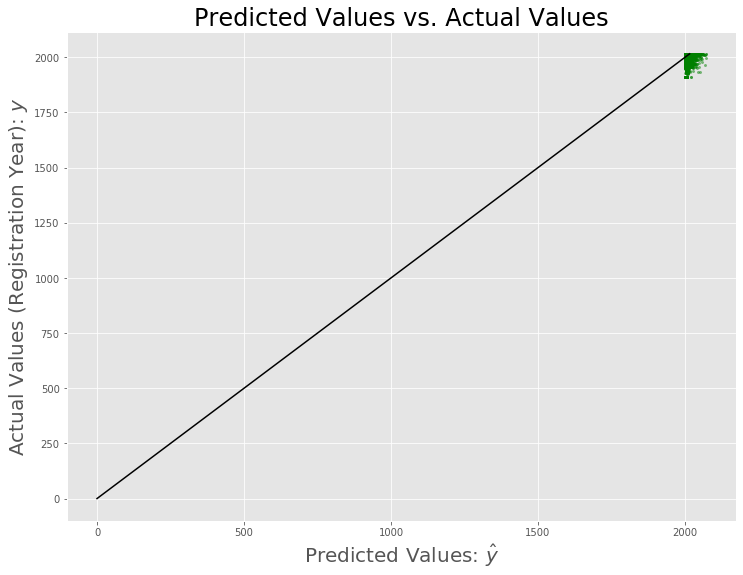

In [194]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions, y, s=5, color='green', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values (Registration Year): $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

This is a summary plot of the regression. It appears to follow the discourse that as the registration year increases so does the predicted values (price, power_ps) with the negative or outliers being the odometer_km. This makes sense as the number kilometers (odometer_km) will be more with an older car and inverse to the age of the car whereas the power of the car and price will have gone up the newer (younger) the car is. 

# Conclusions

In this data analysis we discovered that:
- Linear regression predictive modeling showed that as registration year increases so does price and power_ps, but odometer_km is inversely related to this as older cars have more miles. 
- The strongest correlation based on Pearson coefficient is registration year and price and this is also significant based on p value. 
- It appears that the more expensive car brands have higher mean mileage and the less expensive car brands have the lower mean mileage.
- Audi, BMW and Mercedes Benz are more expensive with Audi being the most expensive cars.
- Ford and Opel are less expensive with Opel being the least expensive.
- Volkswagen is in between - this may explain its popularity, it may be a 'best of 'both worlds' option.
- German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.
- The majority of cars were registered around the period of 1999 to 2008. However, the standard deviation was 81 years. 
- Odometer and Price fields on eBay were rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there were more high mileage than low mileage vehicles listed on the site. 